In [190]:
import numpy as np
import matplotlib.pyplot as plt

data = [
        {
            "mass": 0.267,
            "results": [
                [5.81, 5.69, 5.74],
                [6.83, 6.81, 6.79],
                [7.29, 7.27, 7.59],
                [8.75, 9.26, 9.43],
                [10.69, 10.62, 10.68],
                [12.2, 12.09, 12.14],
                ]
            },
        {
            "mass": 0.487,
            "results": [
                [3.9, 3.85, 3.92],
                [4.39, 4.46, 4.41],
                [5.34, 5.39, 5.53],
                [6.11, 6.25, 6.12],
                [6.27, 7.11, 7.06],
                [8.04, 7.94, 8.01],
                ]
            },
        {
            "mass": 0.707,
            "results": [
                [3.09, 3.13, 3.20],
                [3.33, 3.36, 3.26],
                [3.92, 4.33, 4.43],
                [4.64, 4.73, 4.57],
                [5.46, 5.34, 5.68],
                [6.23, 6.35, 6.26],
                ]
            },
        {
            "mass": 0.927,
            "results": [
                [2.75, 2.89, 2.76],
                [3.12, 3.06, 2.95],
                [3.74, 3.66, 3.64],
                [4.20, 4.12, 4.23],
                [4.63, 4.61, 4.79],
                [5.18, 5.27, 5.34],
                ]
            },
        ]

h = 0.7
d = 46 / 10 / 100
g = 9.8195


In [191]:
student_koef = 4.302652729911275
deltaT = np.std(data[0]['results'][0]) * student_koef / np.sqrt(3)
print(deltaT)
print(np.std(data[0]['results'][0]))

0.12225951257541944
0.049216076867444336


In [209]:
eps_m_space = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}
for res_for_mass in data:
    mass = res_for_mass["mass"]
    t_row = ""
    a_row = ""
    eps_row = ""
    moment_row = ""
    # print("Mass is ", mass)
    for i in range(len(res_for_mass["results"])):
        # print(i)
        res = res_for_mass["results"][i]
        # print(res)
        t_avg = np.mean(res)
        print(mass, t_avg)
        a = 2 * h / (t_avg**2)
        epsilon = 2 * a / d
        moment = mass * d / 2 * (g - a)
        eps_m_space[i] += [(epsilon, moment, t_avg)]
        # print(eps_m_space[i])
        # t_row += f"& {(t_avg * 100).round() / 100}\t"
        # a_row += f"& {(a * 100).round() / 100}\t"
        # eps_row += f"& {(epsilon * 100).round() / 100}\t"
        # moment_row += f"& {(moment * 100).round() / 100}\t"
    # print(t_row + "\\\\")
    # print(a_row + "\\\\")
    # print(eps_row + "\\\\")
    # print(moment_row + "\\\\")
    # print("")
    

0.267 5.746666666666667
0.267 6.81
0.267 7.383333333333333
0.267 9.146666666666667
0.267 10.663333333333332
0.267 12.143333333333333
0.487 3.89
0.487 4.42
0.487 5.420000000000001
0.487 6.16
0.487 6.813333333333333
0.487 7.996666666666667
0.707 3.14
0.707 3.3166666666666664
0.707 4.226666666666667
0.707 4.646666666666667
0.707 5.493333333333333
0.707 6.28
0.927 2.8000000000000003
0.927 3.043333333333333
0.927 3.68
0.927 4.183333333333334
0.927 4.676666666666667
0.927 5.263333333333333


In [210]:
eps_m_space[0]

[(1.8431818538219864, 0.06004121296542063, 5.746666666666667),
 (4.022545794528935, 0.10895191918477605, 3.89),
 (6.173634347984837, 0.1573659317329506, 3.14),
 (7.763975155279501, 0.20555423807142856, 2.8000000000000003)]

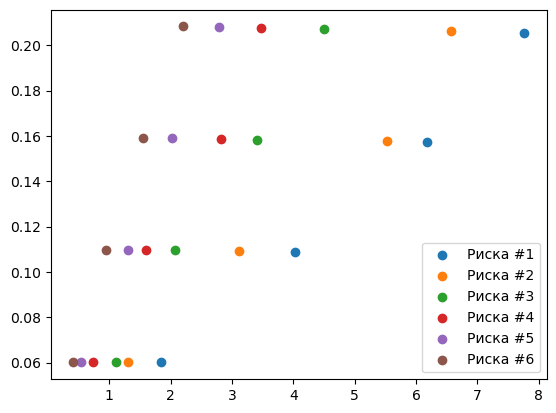

In [211]:
for i in range(6):
    eps_space = [j[0] for j in eps_m_space[i]]
    m_space = [j[1] for j in eps_m_space[i]]
    plt.scatter(eps_space, m_space, label=f"Риска #{i+1}")
plt.legend()

(0.0017978782979044161, 0.13910559311236342, 0.000648710403280213)
Риска #1 - k = 0.02423467574205147	b = 0.012996461868664724
Риска #2 - k = 0.026191383155943153	b = 0.025001124282428247
Риска #3 - k = 0.042561186065174304	b = 0.015781338305946108
Риска #4 - k = 0.05131628311662292	b = 0.02330990598627118
Риска #5 - k = 0.06610521882908887	b = 0.024352157959590767
Риска #6 - k = 0.08284875151574063	b = 0.028599665895196066


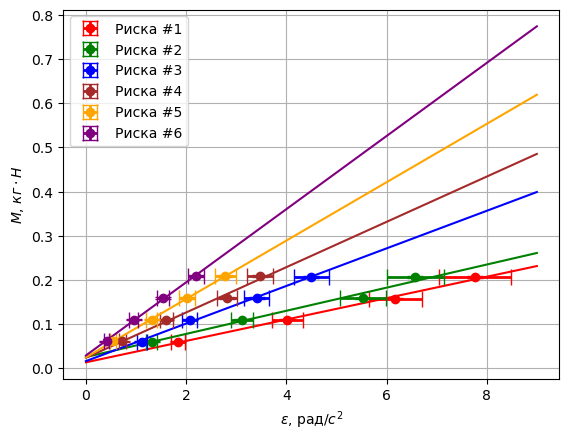

In [270]:
def calculateDeltas(t, m):
    deltaT = 0.122
    d = 46 / 10 / 100
    h = 700 / 10 / 100
    deltaH = 1 / 10 / 100
    g = 9.8195
    deltaM = 0.5 / 1000 # mass
    
    a = 2 * h / t
    eps = 2 * a / d
    
    deltaA = ((- 4 * h / t**3 * deltaT)**2 + (2/t**2 * deltaH)**2)**0.5
    # print("deltaA is", deltaA)
    deltaD = 0.5 / 10 / 100
    deltaEps = ( (2 / d * deltaA)**2 + (2 * a / d**2 * deltaD )**2 )**0.5
    deltaMoment = ( (1 / 2 * d * (g - a) * deltaM)**2 + (1 / 2 * m * (g - a) * deltaD)** 2 + ( m * d / 2 * deltaA)**2  )**0.5
    return (deltaA, deltaEps, deltaMoment)

print(calculateDeltas(5.75, .267))

colors = ['red', 'green', 'blue', 'brown', 'orange', 'purple']

plt.style.use('default')

def t_from_eps(eps):
    return 

i_array = []
for i in range(6):
    eps_space = np.array([j[0] for j in eps_m_space[i]])
    t_space = np.array([j[2] for j in eps_m_space[i]])
    # print(eps_space)
    m_space = np.array([j[1] for j in eps_m_space[i]])
    n = len(eps_space)
    mx = eps_space.sum() / n
    my = m_space.sum() / n
    a2 = np.dot(eps_space.T, eps_space) / n
    a11 = np.dot(eps_space.T, m_space) / n
    kk = (a11 - mx * my) / (a2 - mx ** 2)
    bb = my - kk * mx
    i_array += [kk]
    ff = np.array([kk*z+bb for z in range(10)])
    deltas = [calculateDeltas(t_space[i], .267 + .220 * i) for i in range(len(t_space))]
    eps_error = [d[1] for d in deltas]
    moment_error = [d[2] for d in deltas]
    plt.errorbar(eps_space, m_space, moment_error, eps_error, label=f"Риска #{i+1}", color=colors[i],  fmt='o', linewidth=2, capsize=6)
#     for point_index in range(len(eps_space)):
#         point_eps = eps_space[point_index]
#         point_moment = m_space[point_index]
#         delta_eps = deltas[point_index][1]
#         delta_moment = deltas[point_index][2]
#         plt.plot([point_eps - delta_eps, point_eps + delta_eps], [point_moment, point_moment], color=colors[i])
#         plt.plot([point_eps, point_eps], [point_moment - delta_moment, point_moment + delta_moment], color=colors[i])
    
        
    plt.plot(ff, color=colors[i])
    print(f"Риска #{i+1} - k = {kk}\tb = {bb}")
plt.xlabel(r"$\varepsilon$, рад/$c^2$")
plt.ylabel(r"$M$, $кг \cdot Н$")

plt.grid()
plt.legend()
plt.savefig('img/eps_moment.pdf')

In [272]:
l1 = 0.057
l0 = 25 / 10 / 100
b = 40 / 10 /100
r_squared_array = []
for i in range(len(i_array)):
    I = i_array[i]
    r = l1 + i * l0 + 1/2 *b
    r_squared_array += [r**2]
r_squared_array = np.array(r_squared_array)
i_array = np.array(i_array)
print(i_array, r_squared_array)

[0.02423468 0.02619138 0.04256119 0.05131628 0.06610522 0.08284875] [0.005929 0.010404 0.016129 0.023104 0.031329 0.040804]


In [273]:
n = len(r_squared_array)
mx = r_squared_array.sum() / n
my = i_array.sum() / n
a2 = np.dot(r_squared_array.T, r_squared_array) / n
a11 = np.dot(r_squared_array.T, i_array) / n
kk = (a11 - mx * my) / (a2 - mx ** 2)
bb = my - kk * mx

Масса ут.: 0.432574806864291
I_0 0.012050002896261493


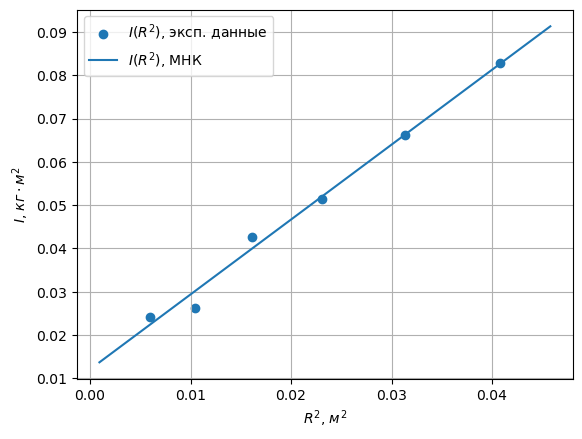

In [274]:
plt.xlabel(r"$R^2$, $м^2$")
plt.ylabel(r"$I$, $кг \cdot м^2$")
plt.scatter(r_squared_array, i_array, label=r'$I(R^2)$, эксп. данные')
x_space = np.linspace(r_squared_array[0] - .005, r_squared_array[-1] + .005)
mnk_space = [kk*z+bb for z in x_space]
# print(mnk_space)
plt.plot(x_space, mnk_space, label=r'$I(R^2)$, МНК')
plt.legend()
plt.grid()
m_ut = kk / 4
I_0 = bb
print("Масса ут.:", m_ut)
print("I_0", I_0)
plt.savefig('img/i_r_squared.pdf')

In [282]:
error_m_ut = (((np.var(i_array) / np.var(r_squared_array) - kk**2)/(len(i_array)-2))**0.5) / 4
error_i = 4 * error_m_ut * np.mean(r_squared_array**2)
print(error_m_ut, error_i)

0.021641148316908103 5.170515233079186e-05
